In [82]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib.pyplot import imshow

In [160]:
model = load_model('Latest_brain_tumor_handmade.h5')

In [161]:
##########################################################################

[[1.000000e+00 9.656613e-11]]


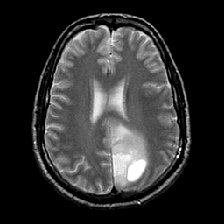

In [223]:
number=35
img_path = 'C:\\Users\\Soumyabroto Banerjee\\Desktop\\Biomedical Image\\Data\\'+str(number).zfill(3)+'.gif'
img_path2='C:\\Users\\Soumyabroto Banerjee\\Desktop\\Biomedical Image\\Output_New\\'+str(number).zfill(3)+'(1).gif.jpg'
img_path1 = 'C:\\Users\\Soumyabroto Banerjee\\Desktop\\Biomedical Image\\Data\\'+str(number).zfill(3)+'(1).gif'

img = image.load_img(img_path,target_size=(224,224))
x1= image.img_to_array(img)
x = np.expand_dims(x1,axis=0)
img_data = preprocess_input(x)
rslt = model.predict(img_data)
print(rslt)
img




[[7.681626e-07 9.999993e-01]]


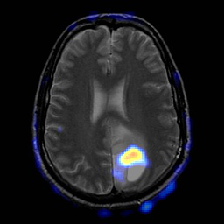

In [224]:

img = image.load_img(img_path2,target_size=(224,224))
x1= image.img_to_array(img)
x = np.expand_dims(x1,axis=0)
img_data = preprocess_input(x)
rslt = model.predict(img_data)
print(rslt)
img

[[0.99793017 0.00206987]]


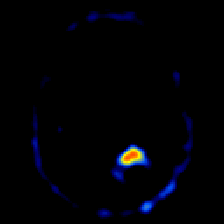

In [225]:
img = image.load_img(img_path1,target_size=(224,224))
x1= image.img_to_array(img)
x = np.expand_dims(x1,axis=0)
img_data = preprocess_input(x)
rslt = model.predict(img_data)
print(rslt)
img


In [ ]:
#################################################################################################################################

In [ ]:
###################################################################################################################################

In [240]:
import cv2
from PIL import Image
im = Image.open("aug__0_144.jpeg")
im_rgb = cv2.cvtColor(np.array(im), cv2.COLOR_BGR2RGB)

In [241]:
pil_img = Image.fromarray(im_rgb)
pil_img.save('Aug4.jpg')

In [ ]:
###########################################################################

In [28]:
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_generator = test_datagen.flow_from_directory(
        'Data/Test',
        target_size=(224, 224),
        color_mode='rgb',
        batch_size=1,
        class_mode='categorical',shuffle=False)

Found 72 images belonging to 2 classes.


In [29]:
step_size_test=test_generator.n//test_generator.batch_size
test_generator.reset()
pred=model.predict_generator(test_generator,
steps=step_size_test,
verbose=1)

72/72 [==============================] - 38s 523ms/step


In [31]:
from sklearn import metrics
print("Accuracy", metrics.accuracy_score(test_generator.labels, np.argmax(pred,axis=1))*100)

Accuracy 97.22222222222221


In [13]:
import scikitplot as skplt
import matplotlib.pyplot as plt

y_true = test_generator.labels
y_probas = pred# predicted probabilities generated by sklearn classifier
skplt.metrics.plot_roc_curve(y_true, y_probas)
plt.show()

ModuleNotFoundError: No module named 'scikitplot'